## Домашнее задание №1

Текст задания можно найти по ссылке https://github.com/vadim0912/MLIntro2021/blob/main/lecture01/HW1.ipynb

Выполнила **Гурова Наталия группа ML-12**

18.10.21

In [1]:
import numpy as np

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.

In [2]:
matrix = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) 
matrix

array([[1, 0, 1],
       [2, 0, 2],
       [3, 0, 3],
       [4, 4, 4]])

In [3]:
def prod_not_null_diag_elems_1(matrix):
    prod = 1
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i == j and matrix[i][j] != 0:
                prod *= matrix[i][j]
    return prod

def prod_not_null_diag_elems_2(matrix):
    prod = 1
    diag_elems = np.diagonal(matrix)
    for i in range(np.size(diag_elems)):
        prod *= diag_elems[i] if diag_elems[i] != 0 else 1
    return prod

def prod_not_null_diag_elems_3(matrix):
    diag_elems = np.diagonal(matrix)
    return np.prod((diag_elems + np.where(diag_elems == 0, 1, 0)))

In [4]:
prod_not_null_diag_elems_1(matrix)

3

In [5]:
prod_not_null_diag_elems_2(matrix)

3

In [6]:
prod_not_null_diag_elems_3(matrix)

3

**Сравним скорость работы этих трех функций**

In [7]:
test_matrix_1 = np.random.randint(-1, 1, (10, 10))

In [8]:
%%timeit
prod_not_null_diag_elems_1(test_matrix_1)

20.5 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit
prod_not_null_diag_elems_2(test_matrix_1)

10.6 µs ± 532 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
%%timeit
prod_not_null_diag_elems_3(test_matrix_1)

15.8 µs ± 472 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Для матрицы 10 на 10 различие времени выполнения векторизованной и не векторизованной функций не очень велико (интересно, что не полностью векторизованный способ работает быстрее векторизованного)

In [11]:
test_matrix_2 = np.random.randint(-1, 1, (50, 50))

In [12]:
%%timeit
prod_not_null_diag_elems_1(test_matrix_2)

154 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%%timeit
prod_not_null_diag_elems_2(test_matrix_2)

30.8 µs ± 570 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%%timeit
prod_not_null_diag_elems_3(test_matrix_2)

15.7 µs ± 241 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Уже на размере 50 на 50 заметно, что векторизованный способ работает быстрее не векторизованного

In [15]:
test_matrix_3 = np.random.randint(-1, 1, (100, 100))

In [16]:
%%timeit
prod_not_null_diag_elems_1(test_matrix_3)

465 µs ± 9.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit
prod_not_null_diag_elems_2(test_matrix_3)

56.8 µs ± 740 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit
prod_not_null_diag_elems_3(test_matrix_3)

15.6 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Для матрицы 100 на 100 векторизованный метод работает примерно в 29 раз быстрее

**Вывод**: в данном случае функции использующие методы numpy работают значительно быстрее, поэтому в работе ими лучше не пренебрегать

###  2.  Дана матрица X и два вектора одинаковой длины i и j.  
### Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [19]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [-1, -2, -3]]) 
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [-1, -2, -3]])

In [20]:
vector_i = np.array([1, 2, 3])

In [21]:
vector_j = np.array([0, 2, 1])

In [22]:
def create_vector_1(matrix, vector_i, vector_j):
    return np.array([matrix[vector_i[k], vector_j[k]] for k in range(vector_i.size)])

def create_vector_2(matrix, vector_i, vector_j):
    return np.array(matrix[vector_i, vector_j])

def create_vector_3(matrix, vector_i, vector_j):
    return matrix[vector_i, vector_j]

In [23]:
create_vector_1(matrix, vector_i, vector_j)

array([ 4,  9, -2])

In [24]:
create_vector_2(matrix, vector_i, vector_j)

array([ 4,  9, -2])

In [25]:
create_vector_3(matrix, vector_i, vector_j)

array([ 4,  9, -2])

**Сравним скорость работы этих трех функций**

In [26]:
test_matrix_1 = np.random.randint(-10, 10, (10, 10))
test_vector_i_1 = np.random.randint(0, 10, 10)
test_vector_j_1 = np.random.randint(0, 10, 10)

In [27]:
%%timeit
create_vector_1(test_matrix_1, test_vector_i_1, test_vector_j_1)

8.24 µs ± 340 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%%timeit
create_vector_2(test_matrix_1, test_vector_i_1, test_vector_j_1)

3.74 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
%%timeit
create_vector_3(test_matrix_1, test_vector_i_1, test_vector_j_1)

3.74 µs ± 431 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Для массива из 10 элементов разница в 2 раза

In [30]:
test_matrix_2 = np.random.randint(-10, 10, (100, 100))
test_vector_i_2 = np.random.randint(0, 100, 50)
test_vector_j_2 = np.random.randint(0, 100, 50)

In [31]:
%%timeit
create_vector_1(test_matrix_2, test_vector_i_2, test_vector_j_2)

34 µs ± 4.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
%%timeit
create_vector_2(test_matrix_2, test_vector_i_2, test_vector_j_2)

4.81 µs ± 361 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
%%timeit
create_vector_3(test_matrix_2, test_vector_i_2, test_vector_j_2)

3.98 µs ± 245 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Разница в 10 раз

In [34]:
test_matrix_3 = np.random.randint(-10, 10, (500, 500))
test_vector_i_3 = np.random.randint(0, 500, 3000)
test_vector_j_3 = np.random.randint(0, 500, 3000)

In [35]:
%%timeit
create_vector_1(test_matrix_3, test_vector_i_3, test_vector_j_3)

2.07 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
create_vector_2(test_matrix_3, test_vector_i_3, test_vector_j_3)

42 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
%%timeit
create_vector_3(test_matrix_3, test_vector_i_3, test_vector_j_3)

36.7 µs ± 630 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Вывод**: функция, использующая чистый numpy, работает в разы быстрее функции с циклом for. При этом лишняя функция np.array незначительно увеличивает время работы, поэтому ее наличие или отсутствие не очень существенно 

### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество

In [38]:
v1 = np.array([1, 2, 3, 3, 5])
v2 = np.array([3, 5, 3, 1, 2])

In [39]:
def is_same_multiset_1(v1, v2):
    d_v1 = dict.fromkeys(set(v1), 0);
    for i in v1:
        d_v1[i] += 1;
        
    d_v2 = dict.fromkeys(set(v2), 0);
    for i in v2:
        d_v2[i] += 1;
        
    return d_v1 == d_v2

def is_same_multiset_2(v1, v2):
    return sorted(v1) == sorted(v2)

def is_same_multiset_3(v1, v2):
    if(np.size(v1) != np.size(v2)):
        return False
    return (np.sort(v1) == np.sort(v2)).all()

def is_same_multiset_4(v1, v2):
    return np.array_equal(np.sort(v1), np.sort(v2))

In [40]:
is_same_multiset_1(v1, v2)

True

In [41]:
is_same_multiset_2(v1, v2)

True

In [42]:
is_same_multiset_3(v1, v2)

True

In [43]:
is_same_multiset_4(v1, v2)

True

**Сравним скорость работы этих четырех функций**

In [44]:
test_v1_1 = np.random.randint(0, 10, 10)
test_v2_1 = np.random.randint(-10, 10, 10)

In [45]:
%%timeit
is_same_multiset_1(test_v1_1, test_v2_1)

14 µs ± 493 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
%%timeit
is_same_multiset_2(test_v1_1, test_v2_1)

5 µs ± 42.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [47]:
%%timeit
is_same_multiset_3(test_v1_1, test_v2_1)

14.6 µs ± 784 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
%%timeit
is_same_multiset_4(test_v1_1, test_v2_1)

15.1 µs ± 73.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
test_v1_2 = np.random.randint(-50, 50, 100)
test_v2_2 = np.random.randint(-50, 50, 100)

In [50]:
%%timeit
is_same_multiset_1(test_v1_2, test_v2_2)

85.8 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [51]:
%%timeit
is_same_multiset_2(test_v1_2, test_v2_2)

36.5 µs ± 712 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [52]:
%%timeit
is_same_multiset_3(test_v1_2, test_v2_2)

15.8 µs ± 712 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [53]:
%%timeit
is_same_multiset_4(test_v1_2, test_v2_2)

16.5 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
test_v1_3 = np.random.randint(-50, 50, 500)
test_v2_3 = np.random.randint(-50, 50, 450)

In [55]:
%%timeit
is_same_multiset_1(test_v1_3, test_v2_3)

378 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
%%timeit
is_same_multiset_2(test_v1_3, test_v2_3)

207 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
%%timeit
is_same_multiset_3(test_v1_3, test_v2_3)

2.09 µs ± 41 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [58]:
%%timeit
is_same_multiset_4(test_v1_3, test_v2_3)

22.5 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Вывод**: векторизованная функция работает быстрее (но иногда нужны доп. проверки на длинну массива)

### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

In [59]:
 vector = np.array([6, 2, 0, 3, 0, 0, 5, 0, 7])

In [60]:
# при решении задачи считалось, что в векторе всегда есть хотя бы один нулевой элемент и при этом этот элемент не последний
# иначе нужно было бы возвращать индекс и его уже анализировать

def max_elem_after_null_1(vector):
    ind_max = -1
    for i in range(vector.size - 1):
        if(vector[i] == 0 and (ind_max == -1 or vector[ind_max] < vector[i + 1])):
            ind_max = i + 1
    return vector[ind_max]

def max_elem_after_null_2(vector):
    only_elem_after_null = [vector[i + 1] for i in range(vector.size - 1) if vector[i] == 0]
    return np.max(only_elem_after_null)

def max_elem_after_null_3(vector):
    a = np.concatenate([vector, [0]])
    b = np.concatenate([[1], vector])
    
    return np.max(a * (b == 0))

In [61]:
max_elem_after_null_1(vector)

7

In [62]:
max_elem_after_null_2(vector)

7

In [63]:
max_elem_after_null_3(vector)

7

**Сравним скорость работы этих трех функций**

In [64]:
test_vector_1 = np.concatenate([np.random.randint(-50, 50, 10), [0, 5, 6, 1, 0, 9]])

In [65]:
%%timeit
max_elem_after_null_1(test_vector_1)

5.68 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [66]:
%%timeit
max_elem_after_null_2(test_vector_1)

15.3 µs ± 56.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [67]:
%%timeit
max_elem_after_null_3(test_vector_1)

17.3 µs ± 99.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Пока выгоднее использовать стандартный перебор

In [68]:
test_vector_2 = np.concatenate([np.random.randint(-50, 50, 100), [0, 5, 6, 1, 0, 9]])

In [69]:
%%timeit
max_elem_after_null_1(test_vector_2)

32.6 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [70]:
%%timeit
max_elem_after_null_2(test_vector_2)

47.8 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
%%timeit
max_elem_after_null_3(test_vector_2)

17.8 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Неоднозначный результат)

In [72]:
test_vector_3 = np.concatenate([np.random.randint(-50, 50, 500), [0, 5, 6, 1, 0, 9]])

In [73]:
%%timeit
max_elem_after_null_1(test_vector_3)

150 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [74]:
%%timeit
max_elem_after_null_2(test_vector_3)

172 µs ± 7.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [75]:
%%timeit
max_elem_after_null_3(test_vector_3)

20.5 µs ± 622 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Вывод:** На массивах больших размеров использование функций numpy-я все равно сказывается

### 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [76]:
from PIL import Image   
from PIL import ImageDraw
import numpy as np

img = np.asarray(Image.open('10928184.jpg').convert('RGB'))
grey_vector = np.array([0.299, 0.587, 0.114])

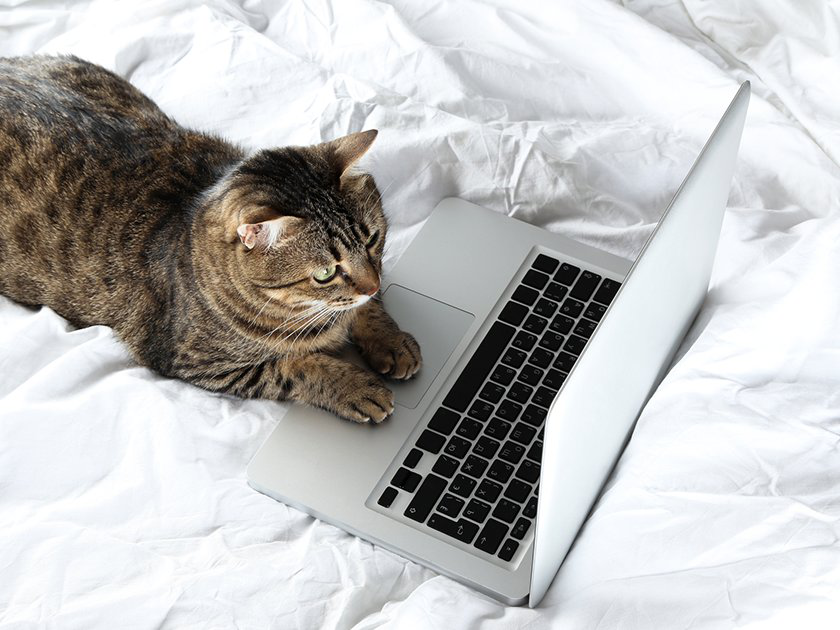

In [77]:
Image.fromarray(img)

In [83]:
def grey_image_1(file, vector):
    img = np.asarray(Image.open(file).convert('RGB'))
    new_image = np.zeros((img.shape[0], img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i][j] = np.sum(img[i][j] * vector)
    return Image.fromarray((new_image * 255).astype(np.uint8))

def grey_image_2(file, vector):
    img = Image.open(file)
    d = ImageDraw.Draw(img)
    pix = img.load()
    
    new_img = np.zeros((img.size[0], img.size[1]))
    
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            new_img[i][j] = np.sum(np.array([pix[i, j][0], pix[i, j][1], pix[i, j][2]]) * vector)
    
    return Image.fromarray((new_img * 255).astype(np.uint8)) 

def grey_image_3(file, vector):
    img = np.asarray(Image.open(file).convert('RGB'))
    new_img = np.sum(img * vector, axis=2)
    return Image.fromarray((new_img * 255).astype(np.uint8))

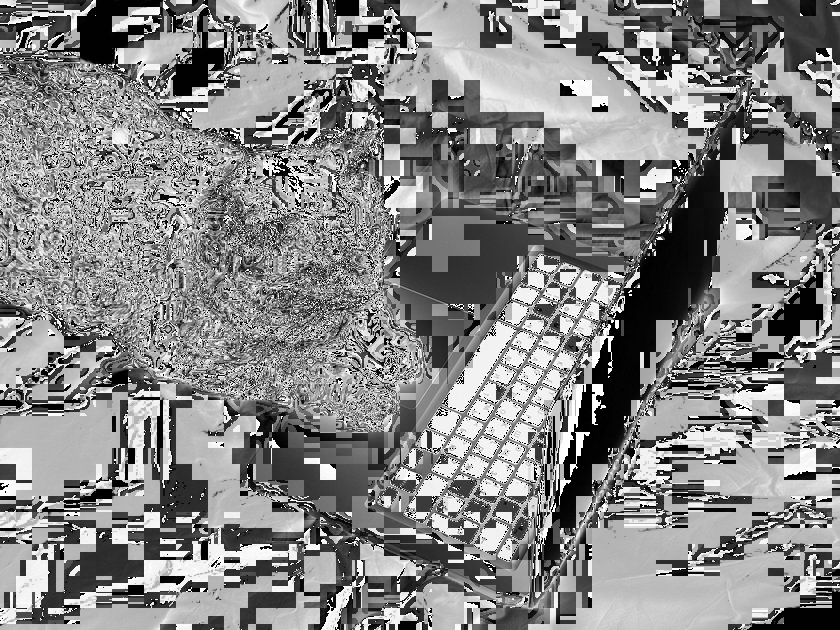

In [84]:
grey_image_1('10928184.jpg', grey_vector)

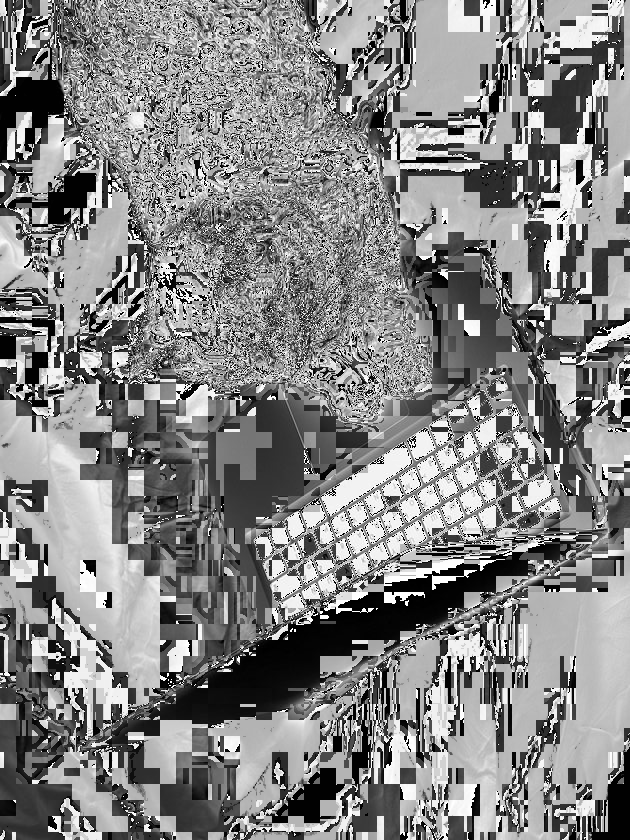

In [85]:
grey_image_2('10928184.jpg', grey_vector)

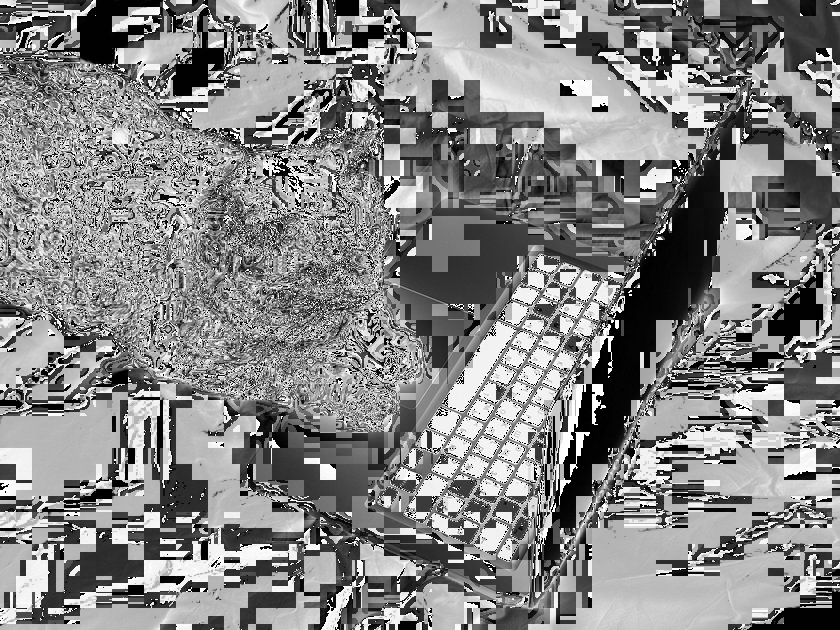

In [86]:
grey_image_3('10928184.jpg', grey_vector)

**Сравним скорость работы этих двух функций**

In [87]:
test_file_1 = '10928184.jpg'
test_file_2 = '0d2ed6803a8e6b47bc7cf474c33e9c4a.jpg'
test_file_3 = '1200x630bb.jpg'

In [88]:
%%timeit
grey_image_1(test_file_1, grey_vector)

4.4 s ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
%%timeit
grey_image_2(test_file_1, grey_vector)

5.82 s ± 38.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [90]:
%%timeit
grey_image_3(test_file_1, grey_vector)

40.8 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
%%timeit
grey_image_1(test_file_2, grey_vector)

8.4 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
%%timeit
grey_image_2(test_file_2, grey_vector)

11.1 s ± 245 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%%timeit
grey_image_3(test_file_2, grey_vector)

60.4 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
%%timeit
grey_image_1(test_file_3, grey_vector)

3.31 s ± 52.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
%%timeit
grey_image_2(test_file_3, grey_vector)

4.38 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
%%timeit
grey_image_3(test_file_3, grey_vector)

20.9 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Вывод:** в случае даже какой-то самой простой работы с изображениями всегда нужно как огня остерегаться функций написанных лапками, так как работают они намного дольше векторизованных

### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

In [97]:
x = np.array([2, 2, 2, 3, 3, 3, 5])

In [98]:
def code_vector_1(x):
    dict_x = dict.fromkeys(set(x), 0);
    for i in x:
        dict_x[i] += 1;
        
    return np.array(list(dict_x.keys())), np.array(list(dict_x.values()))

def code_vector_2(x):
    values = list(set(x))
    counts = [list(x).count(i) for i in values]
    return np.array(values), np.array(counts)
    
def code_vector_3(x):
    return np.unique(x, return_counts=True)

In [99]:
code_vector_1(x)

(array([2, 3, 5]), array([3, 3, 1]))

In [100]:
code_vector_2(x)

(array([2, 3, 5]), array([3, 3, 1]))

In [101]:
code_vector_3(x)

(array([2, 3, 5]), array([3, 3, 1], dtype=int64))

**Сравним скорость работы этих трех функций**

In [102]:
test_x_1 = np.random.randint(0, 10, 10)

In [103]:
%%timeit
code_vector_1(test_x_1)

11.6 µs ± 725 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [104]:
%%timeit
code_vector_2(test_x_1)

19.6 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [105]:
%%timeit
code_vector_3(test_x_1)

26.7 µs ± 505 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [106]:
test_x_2 = np.random.randint(0, 10, 100)

In [107]:
%%timeit
code_vector_1(test_x_2)

41.5 µs ± 765 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [108]:
%%timeit
code_vector_2(test_x_2)

97.8 µs ± 845 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [109]:
%%timeit
code_vector_3(test_x_2)

27.3 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [110]:
test_x_3 = np.random.randint(0, 10, 1000)

In [111]:
%%timeit
code_vector_1(test_x_3)

337 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [112]:
%%timeit
code_vector_2(test_x_3)

792 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [113]:
%%timeit
code_vector_3(test_x_3)

38.8 µs ± 461 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Вывод:** массивы очень медленная штука. Numpy опять выигрывает

### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist

In [114]:
x = np.array([[1, 2], [3, 4], [3, 4]])
y = np.array([[8, 9], [9, 10]])

In [119]:
from scipy.spatial import distance

In [123]:
def euclidean_distance_1(x, y):
    mat = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            mat[i][j] = ((x[i][0] - y[j][0])**2 + (x[i][1] - y[j][1])**2)**0.5
    return mat

def euclidean_distance_2(x, y):
    return distance.cdist(x, y)

def euclidean_distance_3(x, y):
    mat = [[((x[i][0] - y[j][0])**2 + (x[i][1] - y[j][1])**2)**0.5 for j in range(y.shape[1])] for i in range(x.shape[0])]
    return mat

In [124]:
euclidean_distance_1(x, y)

array([[ 9.89949494, 11.3137085 ],
       [ 7.07106781,  8.48528137],
       [ 7.07106781,  8.48528137]])

In [125]:
euclidean_distance_2(x, y)

array([[ 9.89949494, 11.3137085 ],
       [ 7.07106781,  8.48528137],
       [ 7.07106781,  8.48528137]])

In [126]:
euclidean_distance_3(x, y)

[[9.899494936611665, 11.313708498984761],
 [7.0710678118654755, 8.48528137423857],
 [7.0710678118654755, 8.48528137423857]]

**Сравним скорость работы этих двух функций**

In [127]:
test_x_1 = np.random.randint(-100, 100, (10, 2))
test_y_1 = np.random.randint(-100, 100, (10, 2))

In [128]:
%%timeit
euclidean_distance_1(test_x_1, test_y_1)

115 µs ± 2.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [129]:
%%timeit
euclidean_distance_2(test_x_1, test_y_1)

8.91 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [130]:
%%timeit
euclidean_distance_3(test_x_1, test_y_1)

118 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [131]:
test_x_2 = np.random.randint(-100, 100, (100, 2))
test_y_2 = np.random.randint(-100, 100, (100, 2))

In [132]:
%%timeit
euclidean_distance_1(test_x_2, test_y_2)

1.12 ms ± 7.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [133]:
%%timeit
euclidean_distance_2(test_x_2, test_y_2)

60.3 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [134]:
%%timeit
euclidean_distance_3(test_x_2, test_y_2)

1.16 ms ± 9.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [135]:
test_x_3 = np.random.randint(-100, 100, (500, 2))
test_y_3 = np.random.randint(-100, 100, (500, 2))

In [136]:
%%timeit
euclidean_distance_1(test_x_3, test_y_3)

5.69 ms ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
%%timeit
euclidean_distance_2(test_x_3, test_y_3)

1.62 ms ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [138]:
%%timeit
euclidean_distance_3(test_x_3, test_y_3)

5.92 ms ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Вывод:** scipy VS лапки  =  1 : 0

### Вывод по проделанной работе: нужно пользоваться библиотеками типа numpy, scipy и т.д., так как на больших объемах данных они работают существенно быстрее функций, написанных "лапками"